# Date-a-Scientist
### _ML Capstone Project_
***

An analysis of data from an online dating site, [OKCupid](https://www.okcupid.com/).

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Get data

In [12]:
df = pd.read_csv('profiles.csv')
columns = df.columns

In [13]:
sdd_correl = df[['smokes', 'drinks', 'drugs']].copy()
# Assume NaN in one of these categories means they are not completely abstinant
# l = len(sdd_correl)
# sdd_correl.dropna(inplace=True)
# n = len(sdd_correl)
# frac_answers = n / l * 100
# print(frac_answers)

In [14]:
def is_smoker(smoke):
    if smoke == 'no': return 0
    else: return 1
    
def is_drinker(drink):
    if drink == 'none': return 0
    else: return 1

def is_drugger(drug):
    if drug == 'never': return 0
    else: return 1

In [15]:
sdd_correl['smoker'] = sdd_correl['smokes'].apply(is_smoker)
sdd_correl['drinker'] = sdd_correl['drinks'].apply(is_drinker)
sdd_correl['drugger'] = sdd_correl['drugs'].apply(is_drugger)
sddp = sdd_correl[['smoker', 'drinker', 'drugger']]
sddp.head()

,smoker,drinker,drugger
0,1,1,0
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,0


In [16]:
s, d, g = sddp['smoker'].values, sddp['drinker'].values, sddp['drugger'].values

In [17]:
sdgi = list(s*100 + d*10 + g)

In [35]:
s, d, g, sd, sg, dg, sdg = [0]*7
for each in sdgi:
    num = str(each).zfill(3)
    if num[0] == '1':
        if num[1] == '1':
            if num[2] == '1': sdg += 1
            else: sd += 1
        elif num[2] == '1': sg += 1
        else: s += 1
    elif num[1] == '1':
        if num[2] == '1': dg += 1
        else: d += 1
    elif num[2] == '1': g += 1

print(s, d, g, sd, sg, dg, sdg)

0 31114 0 6610 0 12782 9440


In [42]:
s, d, g, sd, sg, dg, sdg = 0, 31114, 6610, 0, 0, 12782, 9440

In [43]:
from matplotlib_venn import venn3

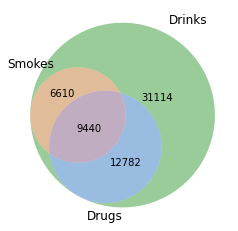

In [44]:
venn3(subsets=(s, 
               d, 
               g, 
               sd, 
               sg, 
               dg,
               sdg), 
      set_labels=('Smokes', 'Drinks', 'Drugs'))